In [3]:
!pip install nltk spacy requests wordcloud matplotlib scikit-learn
!python -m spacy download en_core_web_sm


  Using cached https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-3.7.1/en_core_web_sm-3.7.1-py3-none-any.whl (12.8 MB)
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [4]:
import re
import requests
import spacy
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Télécharger les ressources nécessaires
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')

# Charger Spacy
nlp = spacy.load("en_core_web_sm")

# Définition des stopwords
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [5]:
def load_texts(urls):
    corpus = []
    for url in urls:
        response = requests.get(url)
        text = response.text

        # Supprimer les métadonnées du début et de la fin
        start_idx = text.find("START") + 5
        end_idx = text.find("*** END")
        text = text[start_idx:end_idx]

        # Nettoyage : suppression des caractères non alphabétiques
        text = re.sub(r'[^a-zA-Z\s]', '', text)
        corpus.append(text)

    return corpus

# URLs des livres
urls = [
    "https://www.gutenberg.org/files/11/11-0.txt",
    "https://www.gutenberg.org/files/12/12-0.txt",
    "https://www.gutenberg.org/files/13/13-0.txt"
]

# Charger et nettoyer les textes
books = load_texts(urls)

# Afficher les 200 premiers caractères de chaque livre
for i, book in enumerate(books):
    print(f"Book {i+1} (First 200 chars):\n{book[:200]}\n")


Book 1 (First 200 chars):
 OF THE PROJECT GUTENBERG EBOOK  
Illustration




Alices Adventures in Wonderland

by Lewis Carroll

THE MILLENNIUM FULCRUM EDITION 

Contents

 CHAPTER I     Down the RabbitHole
 CHAP

Book 2 (First 200 chars):
 OF THE PROJECT GUTENBERG EBOOK  
Illustration




THROUGH THE LOOKINGGLASS

And What Alice Found There

By Lewis Carroll

The Millennium Fulcrum Edition 




DRAMATIS PERSON
As arra

Book 3 (First 200 chars):
 OF THE PROJECT GUTENBERG EBOOK  

                    THE HUNTING OF THE SNARK

                     an Agony in Eight Fits


                               by
                          Lewis



In [10]:
import nltk
nltk.download('punkt_tab')

def preprocess_text(text):
    tokens = word_tokenize(text.lower())  # Minuscule et tokenisation
    tokens = [word for word in tokens if word not in stop_words]  # Suppression des stopwords
    return tokens

# Appliquer le prétraitement
tokenized_books = [preprocess_text(book) for book in books]

# Afficher les 150 premiers tokens de chaque livre
for i, tokens in enumerate(tokenized_books):
    print(f"Book {i+1} (First 150 tokens):\n{tokens[:150]}\n")


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


Book 1 (First 150 tokens):
['project', 'gutenberg', 'ebook', 'illustration', 'alices', 'adventures', 'wonderland', 'lewis', 'carroll', 'millennium', 'fulcrum', 'edition', 'contents', 'chapter', 'rabbithole', 'chapter', 'ii', 'pool', 'tears', 'chapter', 'iii', 'caucusrace', 'long', 'tale', 'chapter', 'iv', 'rabbit', 'sends', 'little', 'bill', 'chapter', 'v', 'advice', 'caterpillar', 'chapter', 'vi', 'pig', 'pepper', 'chapter', 'vii', 'mad', 'teaparty', 'chapter', 'viii', 'queens', 'croquetground', 'chapter', 'ix', 'mock', 'turtles', 'story', 'chapter', 'x', 'lobster', 'quadrille', 'chapter', 'xi', 'stole', 'tarts', 'chapter', 'xii', 'alices', 'evidence', 'chapter', 'rabbithole', 'alice', 'beginning', 'get', 'tired', 'sitting', 'sister', 'bank', 'nothing', 'twice', 'peeped', 'book', 'sister', 'reading', 'pictures', 'conversations', 'use', 'book', 'thought', 'alice', 'without', 'pictures', 'conversations', 'considering', 'mind', 'well', 'could', 'hot', 'day', 'made', 'feel', 'sleepy', 'st

In [11]:
def stem_tokens(tokens):
    return [stemmer.stem(word) for word in tokens[:50]]

def lemmatize_tokens(tokens):
    doc = nlp(" ".join(tokens[:50]))
    return [token.lemma_ for token in doc]

# Appliquer stemming et lemmatisation
for i, tokens in enumerate(tokenized_books):
    print(f"Book {i+1} - Stemming:\n{stem_tokens(tokens)}\n")
    print(f"Book {i+1} - Lemmatization:\n{lemmatize_tokens(tokens)}\n")


Book 1 - Stemming:
['project', 'gutenberg', 'ebook', 'illustr', 'alic', 'adventur', 'wonderland', 'lewi', 'carrol', 'millennium', 'fulcrum', 'edit', 'content', 'chapter', 'rabbithol', 'chapter', 'ii', 'pool', 'tear', 'chapter', 'iii', 'caucusrac', 'long', 'tale', 'chapter', 'iv', 'rabbit', 'send', 'littl', 'bill', 'chapter', 'v', 'advic', 'caterpillar', 'chapter', 'vi', 'pig', 'pepper', 'chapter', 'vii', 'mad', 'teaparti', 'chapter', 'viii', 'queen', 'croquetground', 'chapter', 'ix', 'mock', 'turtl']

Book 1 - Lemmatization:
['project', 'gutenberg', 'ebook', 'illustration', 'alice', 'adventure', 'wonderland', 'lewis', 'carroll', 'millennium', 'fulcrum', 'edition', 'content', 'chapter', 'rabbithole', 'chapter', 'ii', 'pool', 'tear', 'chapter', 'iii', 'caucusrace', 'long', 'tale', 'chapter', 'iv', 'rabbit', 'send', 'little', 'bill', 'chapter', 'v', 'advice', 'caterpillar', 'chapter', 'vi', 'pig', 'pepper', 'chapter', 'vii', 'mad', 'teaparty', 'chapter', 'viii', 'queen', 'croquetground', 

In [13]:
import nltk
nltk.download('averaged_perceptron_tagger_eng')
def pos_tagging(tokens):
    return nltk.pos_tag(tokens[:50])

def ner_entities(text):
    doc = nlp(text[:1000])  # Limite à 1000 caractères pour performance
    return [(ent.text, ent.label_) for ent in doc.ents]

# Appliquer POS tagging et NER
for i, book in enumerate(books):
    print(f"Book {i+1} - POS Tags:\n{pos_tagging(tokenized_books[i])}\n")
    print(f"Book {i+1} - Named Entities:\n{ner_entities(book)}\n")


[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


Book 1 - POS Tags:
[('project', 'NN'), ('gutenberg', 'NN'), ('ebook', 'NN'), ('illustration', 'NN'), ('alices', 'NNS'), ('adventures', 'VBZ'), ('wonderland', 'VBP'), ('lewis', 'JJ'), ('carroll', 'NN'), ('millennium', 'NN'), ('fulcrum', 'NN'), ('edition', 'NN'), ('contents', 'NNS'), ('chapter', 'NN'), ('rabbithole', 'VBP'), ('chapter', 'NN'), ('ii', 'NN'), ('pool', 'NN'), ('tears', 'NNS'), ('chapter', 'NN'), ('iii', 'VBP'), ('caucusrace', 'NN'), ('long', 'JJ'), ('tale', 'NN'), ('chapter', 'NN'), ('iv', 'JJ'), ('rabbit', 'NN'), ('sends', 'VBZ'), ('little', 'JJ'), ('bill', 'NN'), ('chapter', 'NN'), ('v', 'NN'), ('advice', 'NN'), ('caterpillar', 'JJ'), ('chapter', 'NN'), ('vi', 'NN'), ('pig', 'NN'), ('pepper', 'IN'), ('chapter', 'NN'), ('vii', 'NN'), ('mad', 'JJ'), ('teaparty', 'NN'), ('chapter', 'NN'), ('viii', 'NN'), ('queens', 'VBZ'), ('croquetground', 'JJ'), ('chapter', 'NN'), ('ix', 'NN'), ('mock', 'NN'), ('turtles', 'NNS')]

Book 1 - Named Entities:
[('Wonderland', 'GPE'), ('Lewis Ca

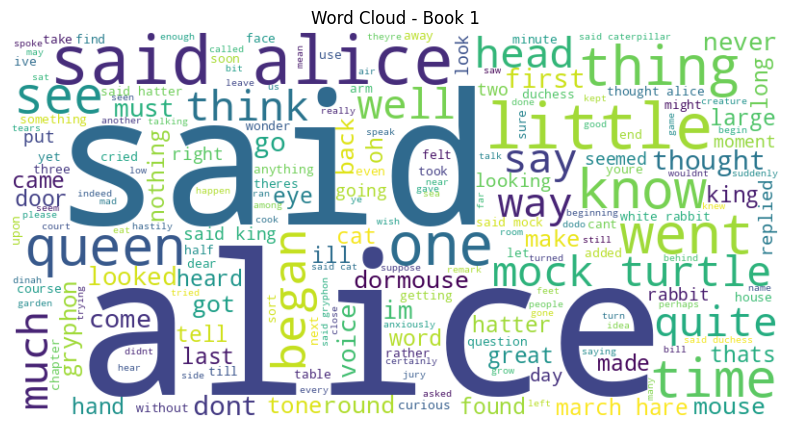

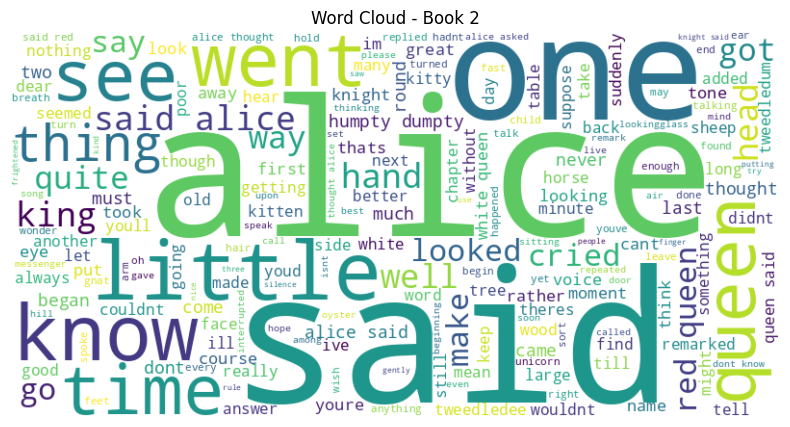

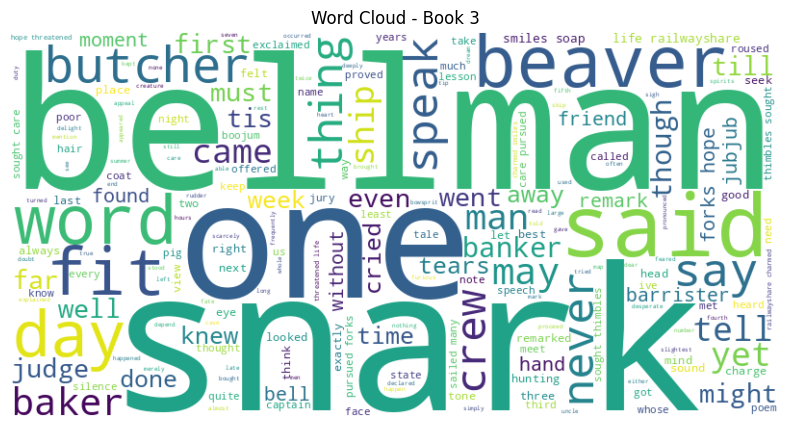

In [14]:
def generate_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(" ".join(text))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(title)
    plt.show()

# Générer un word cloud pour chaque livre
for i, tokens in enumerate(tokenized_books):
    generate_wordcloud(tokens, f"Word Cloud - Book {i+1}")


Top 5 words (BoW): {'alice': 826, 'little': 246, 'one': 269, 'queen': 249, 'said': 959}


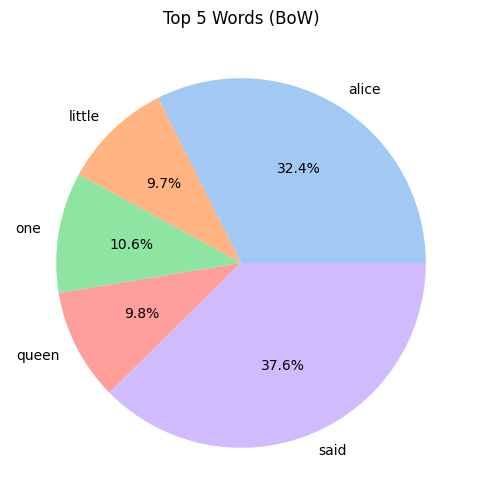

In [15]:
vectorizer = CountVectorizer(max_features=5)
bow_matrix = vectorizer.fit_transform([" ".join(tokens) for tokens in tokenized_books])

# Afficher les 5 mots les plus fréquents
words = vectorizer.get_feature_names_out()
freqs = np.array(bow_matrix.sum(axis=0)).flatten()
word_freq = dict(zip(words, freqs))

print("Top 5 words (BoW):", word_freq)

# Diagramme circulaire
plt.figure(figsize=(6,6))
plt.pie(freqs, labels=words, autopct='%1.1f%%', colors=sns.color_palette("pastel"))
plt.title("Top 5 Words (BoW)")
plt.show()


Top 5 words (TF-IDF): {'alice': 1.8693429831930968, 'get': 0.21576297599674255, 'im': 0.274106255828669, 'queen': 0.5421224489258528, 'round': 0.21353695639799117}


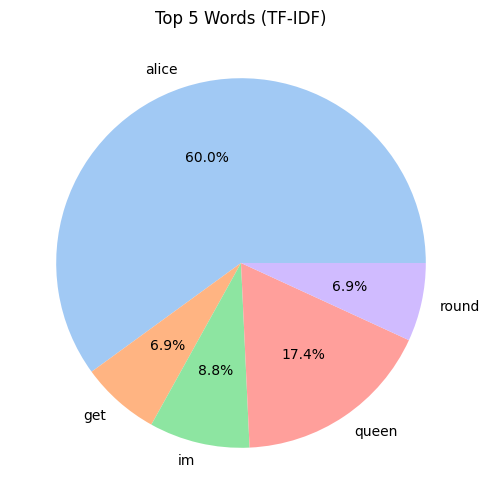

In [16]:
tfidf_vectorizer = TfidfVectorizer(min_df=1, max_df=2, max_features=5)
tfidf_matrix = tfidf_vectorizer.fit_transform([" ".join(tokens) for tokens in tokenized_books])

# Afficher les mots les plus pertinents avec TF-IDF
words_tfidf = tfidf_vectorizer.get_feature_names_out()
freqs_tfidf = np.array(tfidf_matrix.sum(axis=0)).flatten()
word_tfidf_freq = dict(zip(words_tfidf, freqs_tfidf))

print("Top 5 words (TF-IDF):", word_tfidf_freq)

# Diagramme circulaire
plt.figure(figsize=(6,6))
plt.pie(freqs_tfidf, labels=words_tfidf, autopct='%1.1f%%', colors=sns.color_palette("pastel"))
plt.title("Top 5 Words (TF-IDF)")
plt.show()
